In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


Study hours (first five): [4.37086107 9.55642876 7.58794548 6.38792636 2.40416776]
Exam scores (first five): [75.54663825 98.63898519 87.36148597 80.43411331 54.62822887]


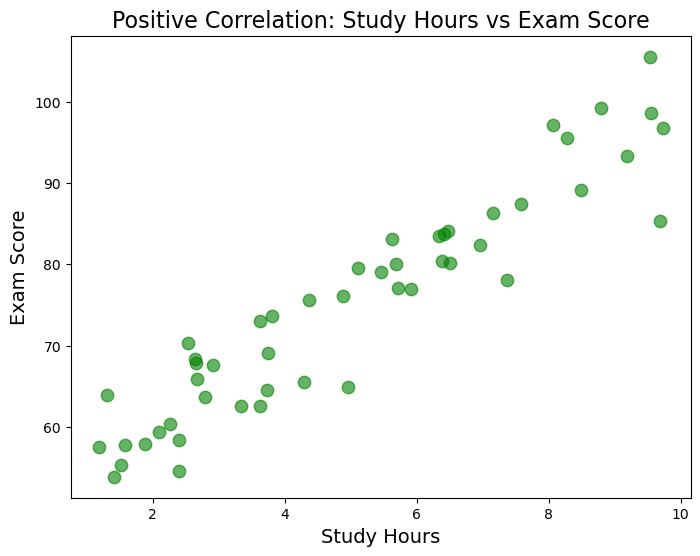

In [2]:
np.random.seed(42) # For reproducibility

# Number of students
n = 50

# Generate study hours between 1 and 10
study_hours = np.random.uniform(1, 10, n)

# Genearte exam scores with some noise (increase with study hours + some random noise)
exam_score = 50 + 5 * study_hours + np.random.normal(0, 5, n)

print("Study hours (first five):", study_hours[:5])
print("Exam scores (first five):", exam_score[:5])


# Scatter plot
plt.figure(figsize = (8, 6))
plt.scatter(study_hours, exam_score, color = 'green', alpha = 0.6, s = 80)

# Add labels and title
plt.title('Positive Correlation: Study Hours vs Exam Score', fontsize = 16)
plt.xlabel('Study Hours', fontsize = 14)
plt.ylabel('Exam Score', fontsize = 14)
plt.show()

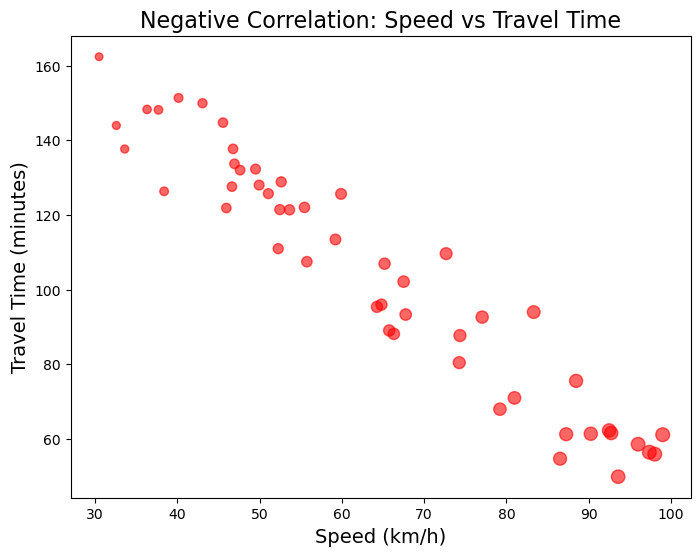

In [3]:
# Generate random speeds between 30 and 100 km/h
speed = np.random.uniform(30, 100, n)

# Generate random stopping distances with some noise (increase with speed + some random noise)
travel_time = 200 - speed * 1.5 + np.random.normal(0, 10, n)

# Scatter plot
plt.figure(figsize = (8, 6))
plt.scatter(speed, travel_time, color = 'red', alpha = 0.6, s = speed)

# Add labels and title
plt.title('Negative Correlation: Speed vs Travel Time', fontsize = 16)  
plt.xlabel('Speed (km/h)', fontsize = 14)
plt.ylabel('Travel Time (minutes)', fontsize = 14)
plt.show()

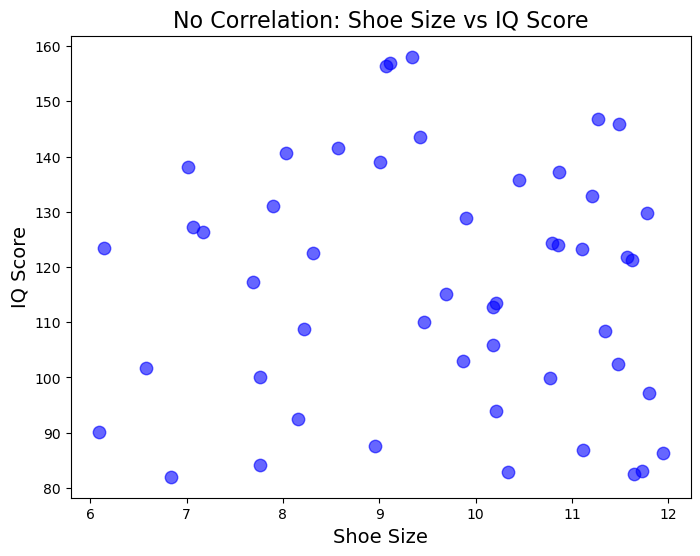

In [4]:
# Generate random shoe sizes between 6 and 12
shoe_size = np.random.uniform(6, 12, n)

# Generate random IQ scores (Completely independent of shoe size - no relationship)
iq_scores = np.random.uniform(80, 160, n)

# Scatter plot
plt.figure(figsize = (8, 6))
plt.scatter(shoe_size, iq_scores, color = 'blue', alpha = 0.6, s = 80)

# Add labels and title
plt.title('No Correlation: Shoe Size vs IQ Score', fontsize = 16)
plt.xlabel('Shoe Size', fontsize = 14)
plt.ylabel('IQ Score', fontsize = 14)
plt.show()

### The Correlation Coefficient (r)

In [5]:
# Step 1: Create the data
x = np.array([4,5,6,7,8])
y = np.array([60,65,75,80,85])

n = len(x)

print("X (Sleep Hours):", x)
print("Y (Exam Scores):", y)
print("n (Length of data):", n)

# Step 2: Calculate all the necessary sums
sum_xy = np.sum(x * y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_y_squared = np.sum(y ** 2)

sum_xwholesquared = sum_x ** 2
sum_ywholesquared = sum_y ** 2


print("="*60)
print("Summation of X: ", sum_x)
print("Summation of Y: ", sum_y)
print("Summation of XY: ", sum_xy)
print("Summation of X squared: ", sum_x_squared)
print("Summation of Y squared: ", sum_y_squared)
print("Summation of X whole squared: ", sum_xwholesquared)
print("Summation of Y whole squared: ", sum_ywholesquared)
print("="*60)

# Step 3: Calculate the correlation coefficient (r)
numerator = n * (sum_xy) - (sum_x * sum_y)
deniminator = np.sqrt((n *(sum_x_squared)- (sum_xwholesquared)) * (n * (sum_y_squared) - sum_ywholesquared))

r = numerator / deniminator

print("Correlation coefficient (r): ", r.round(3))

X (Sleep Hours): [4 5 6 7 8]
Y (Exam Scores): [60 65 75 80 85]
n (Length of data): 5
Summation of X:  30
Summation of Y:  365
Summation of XY:  2255
Summation of X squared:  190
Summation of Y squared:  27075
Summation of X whole squared:  900
Summation of Y whole squared:  133225
Correlation coefficient (r):  0.991


In [6]:
# Using the built-in function

r_numpy = np.corrcoef(x, y)[0, 1]

print("Our manual calculation: r =", r.round(3))
print("NumPy's calculation:    r =", round(r_numpy, 3))
print()
if abs(r - r_numpy) < 0.001:
    print("✅ Both methods give the same result!")
else:
    print("❌ Something went wrong...")


print("="*60)
print(np.corrcoef(x,y))
print("="*60)

Our manual calculation: r = 0.991
NumPy's calculation:    r = 0.991

✅ Both methods give the same result!
[[1.         0.99124071]
 [0.99124071 1.        ]]


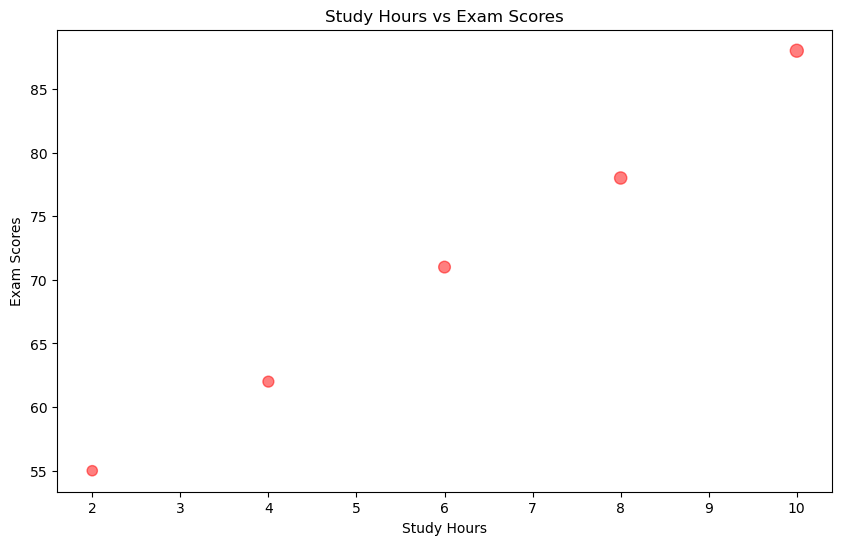

Correlation Coefficient (r): 0.998
Correlation Matrix: [[1.         0.99822011]
 [0.99822011 1.        ]]


In [7]:
df = pd.DataFrame({
    'Name': ['Ali','Bella', 'Carlos', 'Diana', 'Evan'],
    'Study Hours': [2, 4, 6, 8, 10],
    'Exam Scores': [55, 62, 71, 78, 88]
    })

plt.figure(figsize = (10, 6))
plt.scatter(df['Study Hours'], df['Exam Scores'], color = 'red', s = df['Exam Scores'], alpha = 0.5)
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Study Hours vs Exam Scores')

plt.show()


r = df['Study Hours'].corr(df['Exam Scores'])
print("="*60)
print(f"Correlation Coefficient (r): {r:.3f}")
print("="*60)


r_numpy = np.corrcoef(df['Study Hours'], df['Exam Scores'])
print(f"Correlation Matrix: {r_numpy}")
print("="*60)


In [8]:
m = (np.sum((x - x.mean()) * (y - y.mean())))/ np.sum((x - x.mean())**2)

c = y.mean() - m * x.mean()

y_prediction = m * 12 + c

print("="*60)
print(f"Prediction for 12 hours: {y_prediction} marks")

Prediction for 12 hours: 112.0 marks


In [9]:
data = {
    'hours_studied': [2, 4, 6, 8, 10, 12, 14, 16],
    'exam_score':    [55, 60, 65, 70, 75, 80, 85, 90],
    'sleep_hours':   [7, 6.5, 6, 5.5, 5, 4.5, 4, 3.5],
    'coffee_cups':   [1, 1, 2, 2, 3, 3, 4, 4]
}
df = pd.DataFrame(data)

print("="*60)
print(df.info())
print("="*60)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  8 non-null      int64  
 1   exam_score     8 non-null      int64  
 2   sleep_hours    8 non-null      float64
 3   coffee_cups    8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes
None
       hours_studied  exam_score  sleep_hours  coffee_cups
count       8.000000    8.000000     8.000000     8.000000
mean        9.000000   72.500000     5.250000     2.500000
std         4.898979   12.247449     1.224745     1.195229
min         2.000000   55.000000     3.500000     1.000000
25%         5.500000   63.750000     4.375000     1.750000
50%         9.000000   72.500000     5.250000     2.500000
75%        12.500000   81.250000     6.125000     3.250000
max        16.000000   90.000000     7.000000     4.000000


,hours_studied,exam_score,sleep_hours,coffee_cups
hours_studied,1.0000,1.0000,-1.0000,0.9759
exam_score,1.0000,1.0000,-1.0000,0.9759
sleep_hours,-1.0000,-1.0000,1.0000,-0.9759
coffee_cups,0.9759,0.9759,-0.9759,1.0000


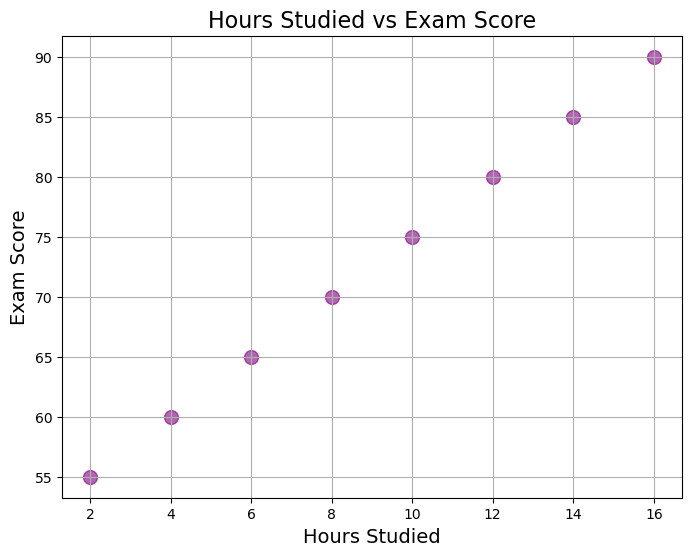

In [10]:
# Correlation Matrix
correlation_matrix = df.corr()
print("="*60)
display(correlation_matrix)

# Visualization
plt.figure(figsize = (8, 6))
plt.scatter(df['hours_studied'], df['exam_score'], color = 'purple', s = 100, alpha = 0.6)
plt.title('Hours Studied vs Exam Score', fontsize = 16)
plt.xlabel('Hours Studied', fontsize = 14)
plt.ylabel('Exam Score', fontsize = 14)
plt.grid(True)

plt.show()

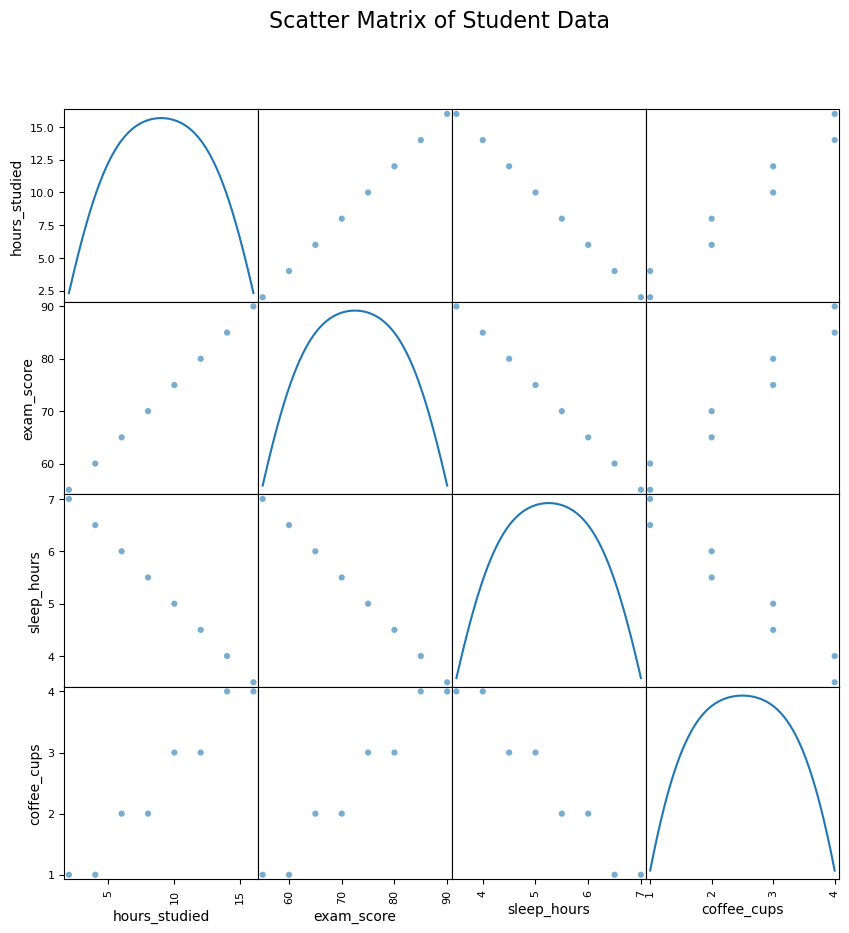

In [11]:
pd.plotting.scatter_matrix(df, figsize = (10, 10), diagonal = 'kde', alpha = 0.6, s = 80)
plt.suptitle('Scatter Matrix of Student Data', fontsize = 16)
plt.show()

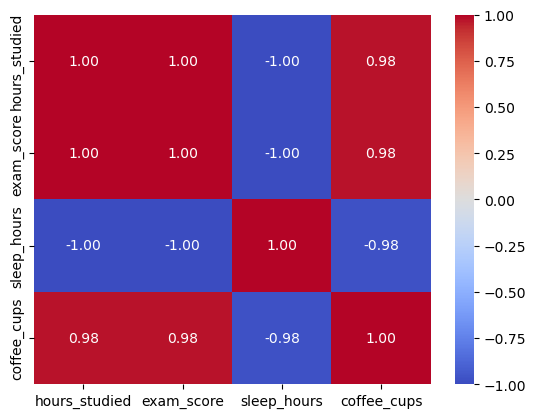

In [12]:
import seaborn as sns 
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

#### A Basic Example of Correlation

In [13]:
import pandas as pd

data = {
    "study_hours": [2,3,4,5,6],
    "exam_score": [50,60,70,80,90]
}

# Create Dataframe
df = pd.DataFrame(data)
display(df)

print("="*60)
# Correlation Coefficinet
r = df['study_hours'].corr(df['exam_score'])
print(f"Correlation Coefficient: {r}")

,study_hours,exam_score
0,2,50
1,3,60
2,4,70
3,5,80
4,6,90


Correlation Coefficient: 1.0


#### Correlation Matrix

   study_hours  exam_score  sleep_hours
0            2          50            8
1            3          60            7
2            4          70            7
3            5          80            6
4            6          90            5


,study_hours,exam_score,sleep_hours
study_hours,1.000000,1.000000,-0.970725
exam_score,1.000000,1.000000,-0.970725
sleep_hours,-0.970725,-0.970725,1.000000


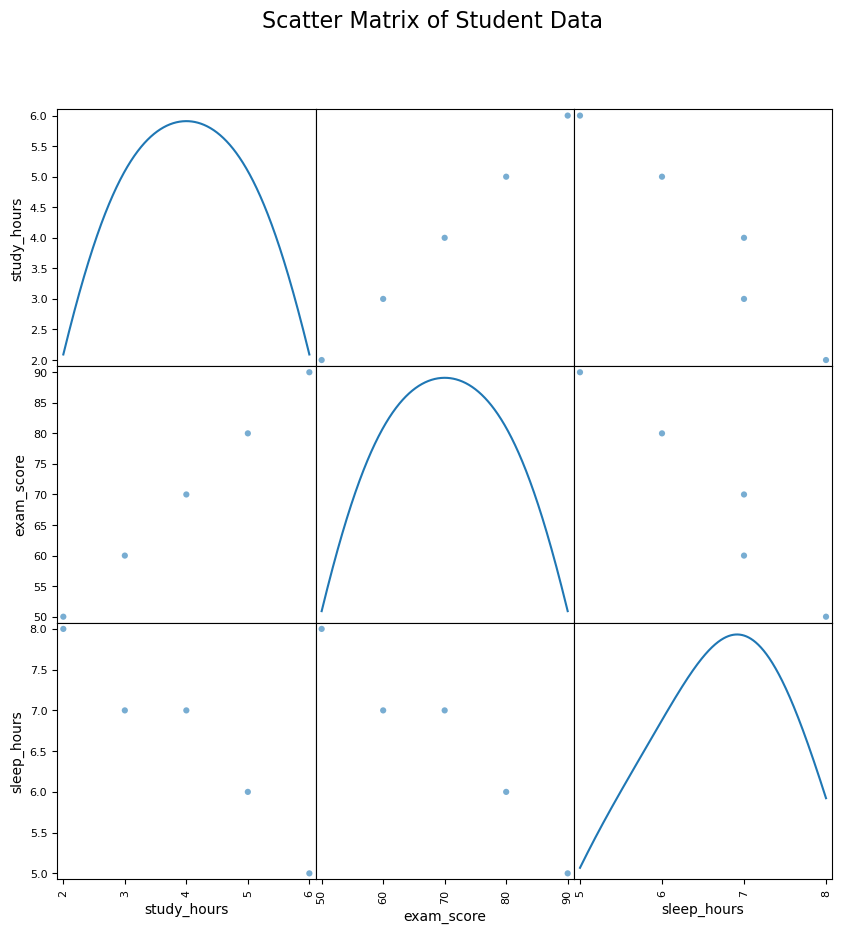

Correlation between study_hours and exam_score: 1.0
Correlation between exam_score and sleep_hours: -0.9707253433941508
Correlation between sleep_hours and study_hours: -0.9707253433941507


In [14]:
data = {
    "study_hours": [2, 3, 4, 5, 6],
    "exam_score":  [50, 60, 70, 80, 90],
    "sleep_hours": [8, 7, 7, 6, 5]
}

df = pd.DataFrame(data)
print(df)


# Apply correlation matrix to all DataFrame
correlation_matrix = df.corr()
print("="*70)
display(correlation_matrix)


pd.plotting.scatter_matrix(df, figsize = (10, 10), diagonal = 'kde', alpha = 0.6, s = 80)
plt.suptitle('Scatter Matrix of Student Data', fontsize = 16)
plt.show()

# Access Individual Correlation Coefficients
print("Correlation between study_hours and exam_score:", correlation_matrix.loc["exam_score", "study_hours"])
print("Correlation between exam_score and sleep_hours:", correlation_matrix.loc["exam_score", "sleep_hours"])
print("Correlation between sleep_hours and study_hours:", correlation_matrix.loc["sleep_hours", "study_hours"])


In [15]:
np.random.seed(0)

study_hours = [2, 3, 4, 5, 6, 3, 4, 5, 2, 6]

# Base score grow with hours, but some noise
base_scores = [40, 50, 60, 70, 80, 55, 65, 75, 45, 85]

# Add some random noise
noise = np.random.normal(loc = 0, scale = 5, size = len(base_scores))

exam_score = (np.array(base_scores) + noise).round(0)


df = pd.DataFrame({
    'study_hours': study_hours,
    'eaxm_score': exam_score
})

display(df)


# Correrlation coefficient
r = df['study_hours'].corr(df['eaxm_score'])
print("="*70)
print(f"The Coreelation coefficient = {r:.3f}")
print("="*70)
print(f"Correlation Matrix = \n {df.corr()}")

,study_hours,eaxm_score
0,2,49.0
1,3,52.0
2,4,65.0
3,5,81.0
4,6,89.0
5,3,50.0
6,4,70.0
7,5,74.0
8,2,44.0
9,6,87.0


The Coreelation coefficient = 0.979
Correlation Matrix = 
              study_hours  eaxm_score
study_hours     1.000000    0.979222
eaxm_score      0.979222    1.000000


## Spearman Correlation
Spearman correlation is a non-parametric measure of the strength and direction of association between two variables.

In [16]:
import pandas as pd

df = pd.DataFrame({
    "years_in_program": [1, 1, 2, 2, 3, 3, 4, 4, 2, 3],
    "satisfaction": [2, 3, 3, 4, 4, 4, 5, 5, 2, 3]
})

df


,years_in_program,satisfaction
0,1,2
1,1,3
2,2,3
3,2,4
4,3,4
5,3,4
6,4,5
7,4,5
8,2,2
9,3,3


In [17]:
r_pearson = df["years_in_program"].corr(df["satisfaction"], method="pearson")
r_spearman = df["years_in_program"].corr(df["satisfaction"], method="spearman")

print("Pearson Correlation:", r_pearson)
print("Spearman Correlation:", r_spearman)


Pearson Correlation: 0.8095238095238096
Spearman Correlation: 0.803225806451613


In [18]:
df = pd.DataFrame({
    "education_years": [12, 16, 16, 18, 20, 14, 18, 10],
    "income": [30000, 50000, 55000, 75000, 100000, 45000, 80000, 5000000]
})

df


,education_years,income
0,12,30000
1,16,50000
2,16,55000
3,18,75000
4,20,100000
5,14,45000
6,18,80000
7,10,5000000


In [19]:
# Calculate correlation
r_pearson = df['education_years'].corr(df['income'], method = 'pearson')
r_spearman = df['education_years'].corr(df['income'], method = 'spearman')

print("="*60)
print(f"Pearson Correlation: {r_pearson}")
print(f"Spearman Correlation: {r_spearman}")

Pearson Correlation: -0.6564871435354065
Spearman Correlation: 0.3132757502627219


In [20]:
df = pd.DataFrame({
    "movie": ["Movie A", "Movie B", "Movie C", "Movie D", "Movie E", 
              "Movie F", "Movie G", "Movie H", "Movie I", "Movie J"],
    "imdb": [8.2, 7.5, 6.8, 8.9, 5.2, 7.1, 9.2, 6.3, 7.8, 8.5],
    "rotten_tomatoes": [82, 70, 65, 88, 42, 68, 92, 55, 76, 85]
})

df


,movie,imdb,rotten_tomatoes
0,Movie A,8.2,82
1,Movie B,7.5,70
2,Movie C,6.8,65
3,Movie D,8.9,88
4,Movie E,5.2,42
5,Movie F,7.1,68
6,Movie G,9.2,92
7,Movie H,6.3,55
8,Movie I,7.8,76
9,Movie J,8.5,85


In [21]:
r_pearson = df["imdb"].corr(df["rotten_tomatoes"], method="pearson")
r_spearman = df["imdb"].corr(df["rotten_tomatoes"], method="spearman")

print("Pearson Correlation:", r_pearson)
print("Spearman Correlation:", r_spearman)


Pearson Correlation: 0.995856443294823
Spearman Correlation: 0.9999999999999999


In [22]:
df = pd.DataFrame({
    "hours_studied": [1, 2, 3, 4, 5, 2, 3, 4],
    "exam_score": [40, 50, 65, 78, 90, 48, 62, 75]
})
df

,hours_studied,exam_score
0,1,40
1,2,50
2,3,65
3,4,78
4,5,90
5,2,48
6,3,62
7,4,75


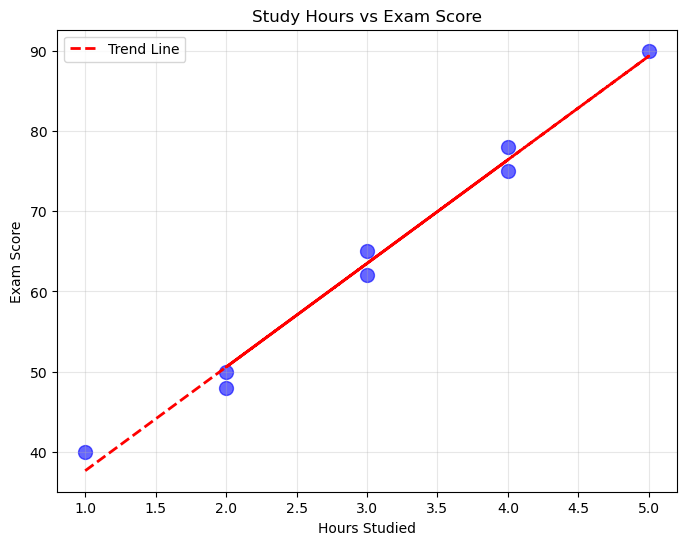

In [23]:
plt.figure(figsize = (8, 6))
plt.scatter(df['hours_studied'], df['exam_score'], s = 100, alpha = 0.6, color = 'b')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')

# Add a trend line (linear)
z = np.polyfit(df['hours_studied'], df['exam_score'], 1)
p = np.poly1d(z)

plt.plot(df['hours_studied'], p(df['hours_studied']), 'r--', linewidth = 2, label = 'Trend Line')
plt.legend()
plt.grid(True, alpha = 0.3)

plt.show()

### Kendall's Tau

Kendall's Tau is a non-parametric correlation coefficient that measures the strength and direction of the association between two variables. It is based on the number of concordant and discordant pairs of observations and is less sensitive to outliers than Pearson's correlation coefficient.


In [25]:
# Data
df = pd.DataFrame({
    "person": ["A", "B", "C", "D"],
    "math_rank": [1, 2, 3, 4],
    "physics_rank": [1, 3, 2, 4]
})

df

,person,math_rank,physics_rank
0,A,1,1
1,B,2,3
2,C,3,2
3,D,4,4


In [35]:
from scipy import stats
spearman_r, spearman_p = stats.spearmanr(df['math_rank'], df['physics_rank'])
print("="*60)
print("Spearman correlation:", spearman_r.round(2))
print("Spearman p-value:", spearman_p.round(2))
print("="*60)

print("Since the p-value is less than 0.05, There is a 20% chance this correlation happened by random luck and conclude that there is a significant correlation between math and physics ranks.")

kendall_r, kendall_p = stats.kendalltau(df['math_rank'], df['physics_rank'])
print("="*60)
print("Kendall correlation:", kendall_r.round(2))
print("Kendall p-value:", kendall_p.round(2))
print("="*60)

print("Since the p-value is less than 0.05, There is a 33% chance this correlation happened by random luck and conclude that there is a significant correlation between math and physics ranks.")

"""
    Need: Strong r (0.5+) AND Low p (< 0.05)

    Your data:
    ├─ Strong r ✓
    ├─ High p ✗
    └─ Result: NOT TRUSTWORTHY

"""
print()


Spearman correlation: 0.8
Spearman p-value: 0.2
Since the p-value is less than 0.05, There is a 20% chance this correlation happened by random luck and conclude that there is a significant correlation between math and physics ranks.
Kendall correlation: 0.67
Kendall p-value: 0.33
Since the p-value is less than 0.05, There is a 33% chance this correlation happened by random luck and conclude that there is a significant correlation between math and physics ranks.



In [37]:
pearson_r, pearson_p = stats.pearsonr(df['math_rank'], df['physics_rank'])
spearman_r, spearman_p = stats.spearmanr(df['math_rank'], df['physics_rank'])
kendall_r, kendall_p = stats.kendalltau(df['math_rank'], df['physics_rank'])


print("="*60)
print(f"Pearson Correlation Coefficient r: {pearson_r:.3f}")
print(f"Pearson Correlation Coefficient p-value: {pearson_p:.3f}")
print("-"*60)

print("="*60)
print(f"Spearman Correlation Coefficient r: {spearman_r:.3f}")
print(f"Spearman Correlation Coefficient p-value: {spearman_p:.3f}")
print("-"*60)


print("="*60)
print(f"Kendall Correlation Coefficient r: {kendall_r:.3f}")
print(f"Kendall Correlation Coefficient p-value: {kendall_p:.3f}")
print("-"*60)

Pearson Correlation Coefficient r: 0.800
Pearson Correlation Coefficient p-value: 0.200
------------------------------------------------------------
Spearman Correlation Coefficient r: 0.800
Spearman Correlation Coefficient p-value: 0.200
------------------------------------------------------------
Kendall Correlation Coefficient r: 0.667
Kendall Correlation Coefficient p-value: 0.333
------------------------------------------------------------


### Point-Biserial Correlation 


In [42]:
df = pd.DataFrame({
    'Person':['A', 'B', 'C', 'D', 'E', 'F'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income': [40000, 50000, 45000, 60000, 42000, 65000]
})

df

,Person,Gender,Income
0,A,Male,40000
1,B,Female,50000
2,C,Male,45000
3,D,Female,60000
4,E,Male,42000
5,F,Female,65000


In [43]:
df['Gender_code'] = [0, 1, 0, 1, 0, 1]
df

point_biserial_r, point_biserial_p = stats.pointbiserialr(df['Gender_code'], df['Income'])

print("="*60)
print(f"Point-Biserial Correlation Coefficient r: {point_biserial_r:.2f}")
print(f"Point-Biserial Correlation Coefficient p-value: {point_biserial_p:.2f}")

Point-Biserial Correlation Coefficient r: 0.86
Point-Biserial Correlation Coefficient p-value: 0.03


In [46]:
passed = [0, 1, 0, 1, 0, 1]
study_hours = [1, 3, 2, 4, 1.5, 5]

r, p_value = stats.pointbiserialr(passed, study_hours)
print("Point-Biserial r:", r)
print("P-value:", p_value)

df.corr()


Point-Biserial r: 0.8885233166386386
P-value: 0.017947913188873177


,treatment,recovery_days
treatment,1.000000,-0.952579
recovery_days,-0.952579,1.000000


In [45]:
# Data
df = pd.DataFrame({
    "treatment": [0, 1, 0, 1, 0, 1, 0, 1],  # 0=No, 1=Yes
    "recovery_days": [14, 8, 15, 7, 13, 9, 16, 6]
})

# Method 1: Point-Biserial (Direct)
r_pb, p_pb = stats.pointbiserialr(df["treatment"], df["recovery_days"])
print("Point-Biserial r:", r_pb)
print("Point-Biserial p:", p_pb)

# Method 2: Pearson on 0/1 (Same result)
r_pearson, p_pearson = stats.pearsonr(df["treatment"], df["recovery_days"])
print("Pearson r:", r_pearson)
print("Pearson p:", p_pearson)


Point-Biserial r: -0.9525793444156803
Point-Biserial p: 0.0002571978168251674
Pearson r: -0.9525793444156803
Pearson p: 0.0002571978168251674
